---

**<font color="green">Reviewer's comment</font>**

Hi, Gaini! You've done a really good job!

My name is **Zhas**, I'll be reviewing your project.

In the notebook you'll meet my comments in markdown cells with "Reviewer's comment" title.

Please don't delete my comments. Great if you choose **<font color="blue">visible color</font>**  or **text format** - It's easier for us to follow the corrections.

---

My comments look like:

<div class="alert alert-block alert-danger">
    

### Reviewer's comment

This comment is required corrections - I can't accept project without it
</div>
    
---

<div class="alert alert-block alert-warning">
    

### Reviewer's comment

This comment correction is up to you - It is recommendation or advice for future
    
</div>

---

<div class="alert alert-block alert-success">
    

### Reviewer's comment

This comment indicates right and quality decision =)

</div>

---


---


<div class="alert alert-block alert-danger">
    

### Reviewer's comment
    
Oops! Something went wrong — let's take a look! 

I looked through your project and found some points to make better your project:
    
- please define axes on all your plots, this is very crucial for any analysis.
- it would be better to make conluding remarks for both parts of the project
    
I believe you can easily fix it :)

</div>

---


---


<div class="alert alert-block alert-success">
    

### Reviewer's comment V2
    
Excellent work Gaini, I am really glad that your project will be accepted. Weldone !

</div>

---


### Project - Making Business decisions based on data

#### Goal:
Prioritize a hypothesis and perform A/B test.

#### Plan:

1. Data preprocessing:

Some of the clients were in both groups. Since this can distort the results these clients will be removed from the analysis.
2. Hypothesis prioritization:

Calculation of ICE and RICE parameters. Conclusions.
3. A/B testing:

Consists of 12 parts.
4. Final Conclusion

<div class="alert alert-block alert-success">
    

### Reviewer's comment

Good job on writing brief introduction
</div>


In [1]:
import pandas as pd
import datetime as dt


hyp = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
hyp

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [2]:
orders = pd.read_csv('/datasets/orders_us.csv')
# Dividing the clients into groups
orders_A = orders.query('group=="A"')
orders_B = orders.query('group=="B"')
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null float64
group            1197 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [3]:
# Identifying the clients of both groups
AB = orders_A.merge(orders_B, on='visitorId', how='inner')
AB_visitors = AB.visitorId.unique()

In [4]:
AB

,transactionId_x,visitorId,date_x,revenue_x,group_x,transactionId_y,date_y,revenue_y,group_y
0,2961555356,4069496402,2019-08-15,10.2,A,1473132782,2019-08-12,10.8,B
1,2223239646,199603092,2019-08-15,55.7,A,437656952,2019-08-02,55.7,B
2,62794304,199603092,2019-08-22,110.3,A,437656952,2019-08-02,55.7,B
3,2971973105,199603092,2019-08-27,45.9,A,437656952,2019-08-02,55.7,B
4,1941707234,199603092,2019-08-12,100.0,A,437656952,2019-08-02,55.7,B
...,...,...,...,...,...,...,...,...,...
178,3757656646,4186807279,2019-08-14,80.8,A,1759418862,2019-08-21,290.5,B
179,3757656646,4186807279,2019-08-14,80.8,A,380064637,2019-08-27,215.4,B
180,3612788481,2712142231,2019-08-14,40.3,A,1251767592,2019-08-16,15.2,B
181,4052155355,2949041841,2019-08-14,5.9,A,1329499668,2019-08-14,160.7,B


In [5]:
# Removing clients from both groups
import numpy as np
orders = orders.loc[np.logical_not(orders.visitorId.isin(AB_visitors))].reset_index(drop=True)

In [6]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,3797467345,1196621759,2019-08-15,155.1,B
3,2282983706,2322279887,2019-08-15,40.5,B
4,182168103,935554773,2019-08-15,35.0,B
...,...,...,...,...,...
1011,3592955527,608641596,2019-08-14,255.7,B
1012,2662137336,3733762160,2019-08-14,100.8,B
1013,2203539145,370388673,2019-08-14,50.1,A
1014,1807773912,573423106,2019-08-14,165.3,A


In [7]:
visits = pd.read_csv('/datasets/visits_us.csv')
visits

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [8]:
# Creating a table with visits the number of visits made by clients while being in group A
AB_visitsX = AB.groupby('date_x')['transactionId_x'].nunique().reset_index()

In [9]:
AB_visitsX.rename(columns={'date_x':'date', 'transactionId_x': 'ab_visits'}, inplace=True)

In [10]:
# Creating a table with visits the number of visits made by clients while being in group B
AB_visitsY = AB.groupby('date_y')['transactionId_y'].nunique().reset_index()

In [11]:
AB_visitsY.rename(columns={'date_y':'date', 'transactionId_y': 'ab_visits'}, inplace=True)

In [12]:
# Removing these visits
deducted_visits = pd.merge(AB_visitsX, AB_visitsY, on='date')

In [13]:
visits = visits.merge(deducted_visits, on='date', how='left').fillna(0)
visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [14]:
visits['visits'] = visits['visits'] - visits['ab_visits_x'] - visits['ab_visits_y']

In [15]:
visits.drop(columns={'ab_visits_x', 'ab_visits_y'}, inplace=True, axis=1)

In [16]:
visits

,date,group,visits
0,2019-08-01,A,714.0
1,2019-08-02,A,617.0
2,2019-08-03,A,507.0
3,2019-08-04,A,709.0
4,2019-08-05,A,751.0
...,...,...,...
57,2019-08-27,B,710.0
58,2019-08-28,B,646.0
59,2019-08-29,B,521.0
60,2019-08-30,B,485.0


The clients who ended up to be in both groups have been removed from the initial data. First, their visitorIds and transactionIds were identified. The table with orders has been cleaned from these visitorIds. The numbers of unique transactions made by clients from both groups were calculated and then substracted from the initial amount of visitors. 

<div class="alert alert-block alert-success">
    

### Reviewer's comment

Preprocessing part has been done very well. You have understood deeply the goal of this project.

</div>

### 2. Hypothesis prioritization

In [17]:
hyp['ICE'] = (hyp['Impact'] * hyp['Confidence'])/hyp['Effort']
print(hyp[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

                                          Hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


In [18]:
hyp['RICE'] = (hyp['Reach'] * hyp['Impact'] * hyp['Confidence'])/hyp['Effort']
print(hyp[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

                                          Hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


The use of ICE parameter has shown that hypotheses 8, 0 and 7 are the most promising. The RICE parameter's results are not really different, hypotheses 7 and 0 are still among the leaders. However,  number 8 has lost its positions due to a low reach parameter, i.e not so many users can be affected by this change. 

<div class="alert alert-block alert-success">
    

### Reviewer's comment

Hypothesis prioritization is correct. Conclusion you've made is also superb. Good job.

</div>


### 3. A/B testing

In [19]:
cumulativeData = visits.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max',\
'group' : 'max',\
'transactionId' : pd.Series.nunique,\
'visitorId' : pd.Series.nunique,'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
cumulativeData

,date,group,transactionId,visitorId,revenue
0,2019-08-01,A,23,19,2266.6
31,2019-08-01,B,17,17,967.2
1,2019-08-02,A,42,36,3734.9
32,2019-08-02,B,40,39,3535.3
2,2019-08-03,A,66,60,5550.1
...,...,...,...,...,...
59,2019-08-29,B,510,490,74576.7
29,2019-08-30,A,460,437,52363.7
60,2019-08-30,B,531,511,77863.5
30,2019-08-31,A,468,445,53212.0


In [20]:
cumulativeData.columns = ['date', 'group', 'n_orders', 'n_visitors', 'revenue']

In [21]:
cumulativeData['conversion'] = cumulativeData['n_orders'] / cumulativeData['n_visitors']

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


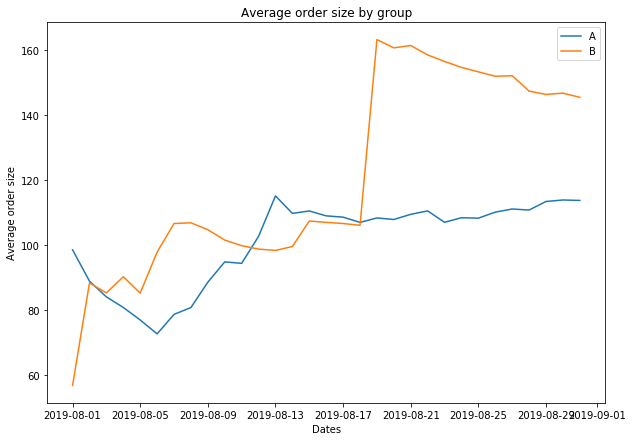

In [22]:
import matplotlib.pyplot as plt
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.figure(figsize=(10,7))
plt.plot(cumulativeDataA['date'], cumulativeDataA['revenue']/cumulativeDataA['n_orders'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['revenue']/cumulativeDataB['n_orders'], label='B')
plt.legend()
plt.title('Average order size by group')
plt.xlabel('Dates')
plt.ylabel('Average order size')
plt.show()

<div class="alert alert-block alert-warning">
    

### Reviewer's comment

- I suggest to use plt.show() at the end of plot to get rid of this : "Text(0.5, 1.0, 'Average order size by group')".
    
  It also applies for other plots
    
    
- Also it would be better to convert date column to datetime type, this would really help you in plotting. In this case if date was a datetime, the you don't have to use plt.xticks(['2019-08-01', '2019-08-05', '2019-08-10', '2019-08-15', '2019-08-20', '2019-08-25', '2019-08-30'], rotation=10)

</div>


<div class="alert alert-block alert-danger">
    

### Reviewer's comment

Sorry, but you haven't defined axes here. I highly recommend to do it.
    
Please consider to make changes not only to this plot, but also others.
</div>

Average order size made by group B increased significantly in the second half of August. Then it gradually decreased while being higher than that of the group A anyway. Around 150 and 110 for groups B and A, respectively. Interestingly, during the first half of the month the increase of average order size for one group were followed by a decrease for another group. It is probably unreliable to make conclusions based on this metric since the graphs have not shown stable results. 

<div class="alert alert-block alert-success">
    

### Reviewer's comment

Conclusion part is well written.
</div>

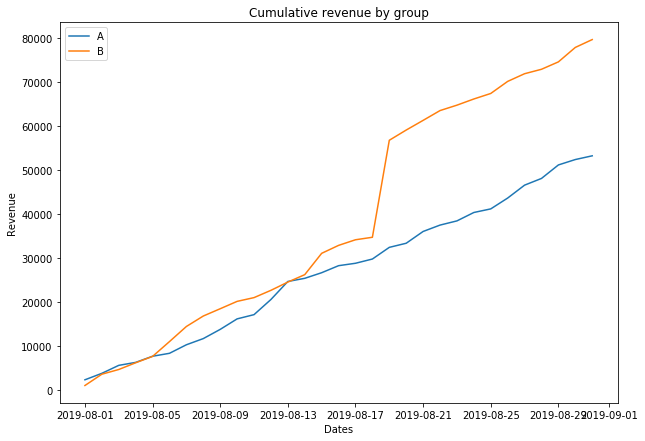

In [23]:
plt.figure(figsize=(10,7))
plt.plot(cumulativeDataA['date'], cumulativeDataA['revenue'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['revenue'], label='B')
plt.legend()
plt.title('Cumulative revenue by group')
plt.xlabel('Dates')
plt.ylabel('Revenue')
plt.show()

Up until mid-August the cumulative revenue gained from both groups were relatively stable and tended to increase. But after that group B had a sudden spike reaching about 60000, while group A stayed at around 30000. This is definitely related to an increase of average order size in group B from the previuos graph. If the number of orders for both groups on 20/08/19 did not change compared to previous dates that would mean that clients of group B either spent more money in general or somebody made a very expensive purchase which led to the distortion of results. 

<div class="alert alert-block alert-success">
    

### Reviewer's comment

In-depth conclusion, amazing !
</div>

In [24]:
cumulativeDataA = cumulativeDataA.reset_index(drop=True)
cumulativeDataB = cumulativeDataB.reset_index(drop=True)

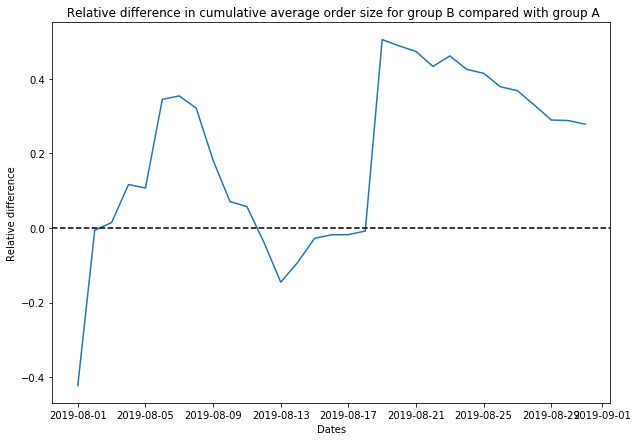

In [25]:
plt.figure(figsize=(10,7))
plt.plot(cumulativeDataB['date'], (cumulativeDataB['revenue']/cumulativeDataB['n_orders'])/(cumulativeDataA['revenue']/cumulativeDataA['n_orders'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title(' Relative difference in cumulative average order size for group B compared with group A')
plt.xlabel('Dates')
plt.ylabel('Relative difference')
plt.show()

The results are not stable and great spikes are probably related to abnormal purchases made in group B.

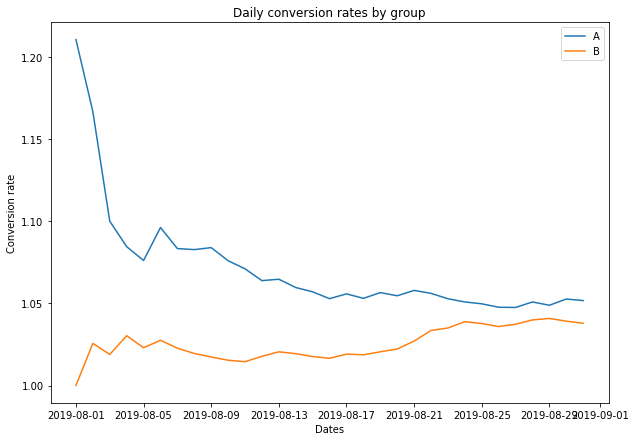

In [26]:
plt.figure(figsize=(10,7))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('Daily conversion rates by group')
plt.xlabel('Dates')
plt.ylabel('Conversion rate')
plt.show()

The conversion rate for group A was much higher at the beginning but it drastically decreased by the end of the first week. The conversion rates stabilized in the end and were practically same for both groups.

<div class="alert alert-block alert-success">
    

### Reviewer's comment

Great, you are properly observed stabilization of the conversion rates

</div>

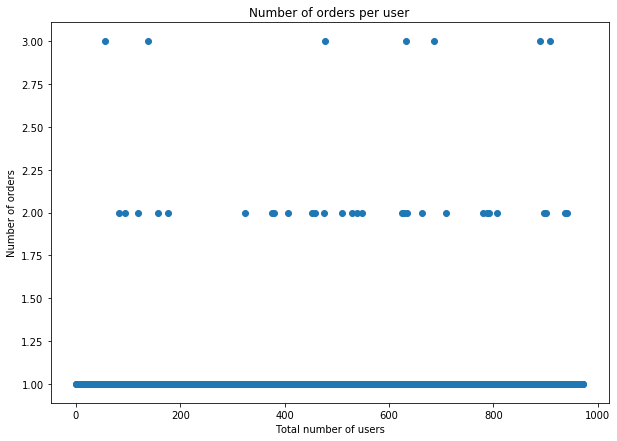

In [27]:
orders_count = orders.pivot_table(index='visitorId', values='transactionId', aggfunc='count').reset_index()

x_values = pd.Series(range(0,len(orders_count['visitorId'])))

plt.figure(figsize=(10,7))
plt.scatter(x=x_values, y=orders_count['transactionId'])
plt.title('Number of orders per user')
plt.ylabel('Number of orders')
plt.xlabel('Total number of users')
plt.show()

The scatter plot which represents the number of orders per user shows that most clients made only one order. And nobody made more than 3 orders that month in general.

In [28]:
print(np.percentile(orders_count['transactionId'], [95, 99]))

[1. 2.]


Only 1% of orders contained more than 2 purchases per customer. It means that orders with more than 2 orders can be considered as anomaly. 

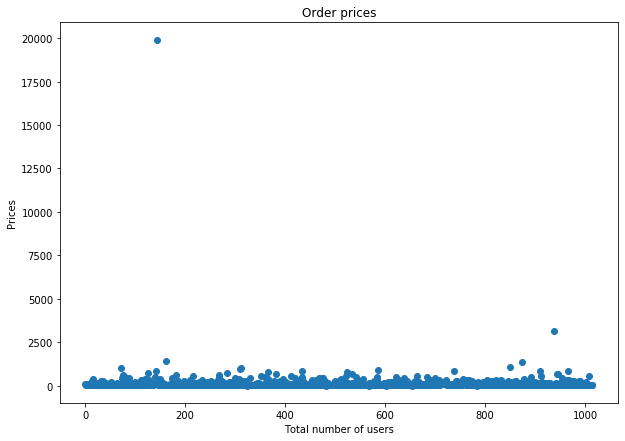

In [29]:
orders_prices = orders.pivot_table(index='transactionId', values='revenue', aggfunc='mean').reset_index()

x_values = pd.Series(range(0,len(orders_prices['transactionId'])))

plt.figure(figsize=(10,7))
plt.scatter(x=x_values, y=orders_prices['revenue'])
plt.title('Order prices')
plt.ylabel('Prices')
plt.xlabel('Total number of users')
plt.show()

The scatter plot with order prices shows that the majority of orders does not exceed 1000. There are two outliers of 20000 and 2500. 

In [30]:
print(np.percentile(orders_prices['revenue'], [95, 99]))

[414.275 830.3  ]


Only 1% of order prices are higher than 830 and only 5% are higher than 414. Order prices more than 415 are considered abnormal. 

---


<div class="alert alert-block alert-success">
    

### Reviewer's comment

The plots are done well.
Good work with anomaly!
    
Abnormal users are defined.
    
It's also helpful to use histogram and boxplot for anomaly research

However, axes haven't been explicitly defined on graphs

</div>

---

### Hypothesis testing for raw data

In [31]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],\
pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],\
pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

H0 - There is no difference in converion rates between groups with raw data.

H1 - There is diff. in converion rates between groups with raw data.

In [32]:
import scipy.stats as stats

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.007
0.155


The p-value is significantly lower than 0.05, which means that we reject the null hypothesis. There is difference in conversion rates and the relative conversion gain for group B compared to group A is 15.5%.

H0 - There is no difference in average order size between groups with raw data.

H1 - There is diff. in average order size between groups with raw data. 

In [33]:
print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.431
0.278


The p-value is very high, we cannot reject the null hyp. Therefore there is no difference in revenue gained from groups with raw data. But the relative average revenue of group B compared to group A is ~28% higher. According to the previous analysis this can be due to abnormal average order sizes in group B. 

### Hypothesis testing for filtered data

In [34]:
# Cleaning the raw data
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 1]['visitorId'], ordersByUsersB[ordersByUsersB['orders'] > 1]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 415]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))

487    113298937
937    148427295
792    204675465
33     249864742
586    358944393
Name: visitorId, dtype: int64


In [35]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],\
pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],\
pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

H0 - There is no difference in converion rates between groups with filtered data.

H1 - There is diff. in converion rates between groups with filtered data.

In [36]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.008
0.174


The p-value is less than the significance level, so we reject the null hyp. There is difference in conversion rates between groups with filtered data and relative conversion gain for group B is 17.4%. 

H0 - There is no difference in average order size between groups with filtered data.

H1 - There is diff. in average order size between groups with filtered data. 

In [37]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.386
-0.033


The p-value does not allow to reject the null hyp. There is no difference n average order size between groups with filtered data. There is also a relative revenue loss for group B compared to group A. 

The tests showed that there is difference in conversion rates between groups with both raw and filtered data. The test of average order size showed that there is no difference between the groups with both raw and filtered data. The test for raw data has shown that there is a relative revenue gain of 28% in group B compared to group A, the results for the filtered data are opposite. They showed that there is, on the contrary, a relative revenue loss of 3%. Large relative revenue gain in group B with raw data was probably due to abnormal order sizes. The test should be stopped since there is no difference between the groups. 

###  Overall Conclusion

The data with visits and orders contained visitorIds that somehow were used for both group A and B. This problem was fixed and the Ids deleted from both dataframes. 

ICE and RICE values were calculated and the hypotheses were sorted according to the results of the calculations. Reach factor caused some changes in previuosly obtained results. For example hypo-s #8 lost its position due to a low reach value. 

Several graphs have been shown the average order prices between the groups and the relative difference for B compared to A. Cumulative revenue by group and the daily conversion rates for the whole month. The data used for the graphs were not filtered, which can be a probable reason why the results for group B are so different. All the graphs except for the daily conversion rates showed a huge increase in orders and revenue for group B in mid-August. Further research with data filtration has justified the assumptions about abnormalities in group B.

Hypotheses testing has shown that the test should be stopped since the groups have not shown any significant differences. 

---


<div class="alert alert-block alert-success">
    

### Reviewer's comment

Fantastic job with the hypothesis testing. Hypotheses are defined correctly, and conclusions meets the result of the testing. Also you have checked filtered data, good job. Overall conclusion is amazing, you are accurate on that.

</div>

---

---


<div class="alert alert-block alert-danger">
    

### Reviewer's comment

Here I suggest you to make overall conclusion for whole project combining both parts.

</div>

---